In [2]:
import pandas as pd
df=pd.read_csv('./표준화완성본.csv')
df

,credit_score,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn,country_France,country_Germany,country_Spain,age_group_gender_eighties_Female,...,age_group_gender_seventies_Female,age_group_gender_seventies_Male,age_group_gender_sixties_Female,age_group_gender_sixties_Male,age_group_gender_teenager_Female,age_group_gender_teenager_Male,age_group_gender_thirties_Female,age_group_gender_thirties_Male,age_group_gender_twenties_Female,age_group_gender_twenties_Male
0,-0.326221,-0.402237,0.439067,0.511633,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.440036,-1.141788,0.517514,0.726664,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.536794,0.464244,-0.450913,-0.705735,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.501521,-0.201650,1.239547,-0.534073,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2.063884,-0.342349,0.514829,0.083927,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,-0.201650,-0.361412,-0.510598,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9996,-1.391939,-1.511880,-0.952871,0.518374,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9997,0.604988,0.032368,-0.561532,-0.626813,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9998,1.256835,-1.376280,-0.409684,-0.543083,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 표준화된 데이터 말고 주성분 분석을 했다
# 주성분 데이터프레임으로 모델 학습을 시도한다

# 주성분 데이터프레임-표준화, 원핫인코딩, 종속 변수 제외

In [4]:
df2 = df[df.columns.difference(['churn'])]

# pca

In [5]:
import pandas as pd
from sklearn.decomposition import PCA

n=6
li=[]
for i in range(1,n+1):
    prin=f'principal {i}'
    li.append(prin)

# 2. PCA 적용
pca = PCA(n_components=n)  # 주성분의 개수 설정
principal_components = pca.fit_transform(df2)

# 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(data=principal_components, columns=li)

In [6]:
pca_df

,principal 1,principal 2,principal 3,principal 4,principal 5,principal 6
0,-0.081152,0.714698,0.111165,0.511516,0.620504,0.250174
1,-0.612193,1.034555,0.228446,0.993473,-0.566902,0.786106
2,-0.001868,0.225956,-1.739145,-0.414447,0.543115,-0.440954
3,0.708717,-0.490695,0.242860,1.120250,0.624937,-0.463350
4,0.058692,-0.990903,1.844525,0.639159,-0.581803,0.739728
...,...,...,...,...,...,...
9995,-0.300257,-1.169865,0.694020,-0.093036,0.626421,-0.238671
9996,-1.760475,1.175212,-0.819321,0.081631,0.675815,0.500717
9997,-0.287707,-0.960169,0.081031,-0.292959,0.620921,0.218612
9998,-1.328276,-1.046260,0.837419,0.730312,-0.581993,-0.908688


In [7]:
pca.explained_variance_ratio_.cumsum()

array([0.19967529, 0.37673071, 0.55023557, 0.70588981, 0.77126845,
       0.81608634])

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
warnings.filterwarnings('ignore')

In [9]:
x = pca_df
y = df['churn']

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [11]:
# 결측치 확인
print(x.isnull().sum())
print(y.isnull().sum())

principal 1    0
principal 2    0
principal 3    0
principal 4    0
principal 5    0
principal 6    0
dtype: int64
0


In [12]:
print(f'X shape: {x.shape}')
print(f'y shape: {y.shape}')

X shape: (10000, 6)
y shape: (10000,)


In [13]:
print(f'X_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (8000, 6)
y_train shape: (8000,)
X_test shape: (2000, 6)
y_test shape: (2000,)


In [14]:
x_train

,principal 1,principal 2,principal 3,principal 4,principal 5,principal 6
9254,0.038362,-0.127823,0.356806,-0.702483,0.619723,0.465375
1561,-0.533417,0.495394,0.141631,0.096578,-0.602786,-0.196640
1670,1.052328,0.572126,-0.797929,-0.978041,-0.681307,0.161990
6087,0.806357,1.466271,-0.159668,-1.873039,0.539674,-0.332157
6669,-0.940374,0.238559,-1.510464,0.159951,0.599837,-0.361050
...,...,...,...,...,...,...
5734,-1.921867,-0.742385,1.026303,0.551825,0.685356,0.306048
5191,-0.031037,-1.007129,-0.293372,1.980855,0.643719,0.266582
5390,0.779076,-0.958602,0.367921,1.146725,0.622241,-0.474948
860,0.529581,0.120207,0.247756,-0.944121,0.558388,-0.408715


In [15]:
y_train

9254    0.0
1561    0.0
1670    1.0
6087    1.0
6669    1.0
       ... 
5734    0.0
5191    0.0
5390    1.0
860     1.0
7270    0.0
Name: churn, Length: 8000, dtype: float64

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
# y_train_pred = model.predict(x_train)
# print(f'Accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

# y_test_pred = model.predict(x_test)
# print(f'Accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# basic-random forest

train accuracy:1.0000
test accuracy:0.8240
Precision: 0.6228
Recall: 0.2646
F1 Score: 0.3714
Confusion Matrix:
[[1544   63]
 [ 289  104]]
ROC AUC: 0.7449


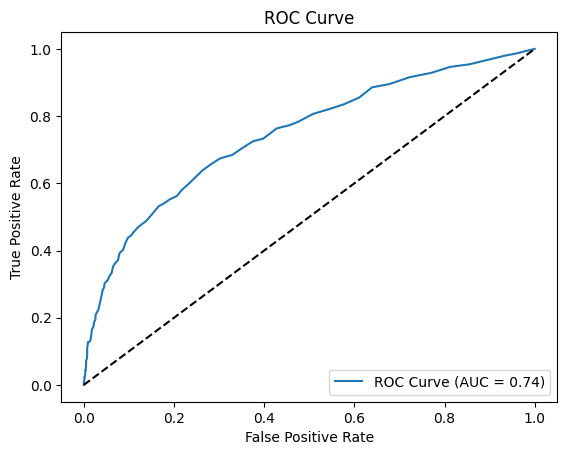

Cross-Validation Scores: [0.8235 0.82   0.817  0.8155 0.816 ]
Mean CV Accuracy: 0.8184


In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_train_pred = rf.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = rf.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = rf.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(rf, x, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data1 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_rf = pd.DataFrame(data1)

In [20]:
df_rf

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,1.0000,0.8240,0.6228,0.2646,0.3714,[[1544 63]\n [ 289 104]],0.7449,[0.8235 0.82 0.817 0.8155 0.816 ],0.8184


# basic-xgboost

train accuracy:0.9476
test accuracy:0.8180
Precision: 0.5729
Recall: 0.2901
F1 Score: 0.3851
Confusion Matrix:
[[1522   85]
 [ 279  114]]
ROC AUC: 0.7231


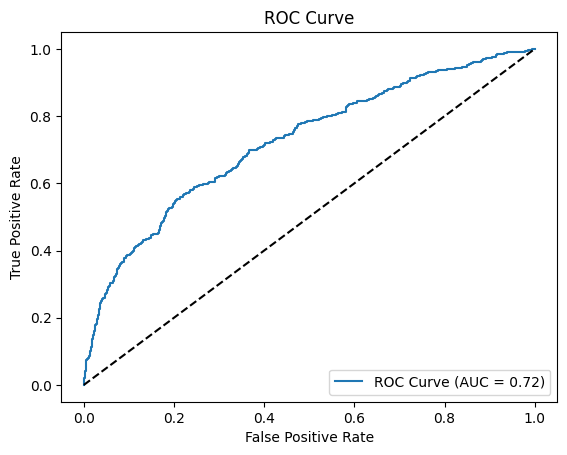

Cross-Validation Scores: [0.8085 0.814  0.821  0.8065 0.808 ]
Mean CV Accuracy: 0.8116


In [21]:
xgb=XGBClassifier(random_state=42)

xgb.fit(x_train,y_train)

y_train_pred = xgb.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = xgb.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = xgb.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(xgb, x, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data2 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_xgb = pd.DataFrame(data2)

In [22]:
df_xgb

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,0.9476,0.8180,0.5729,0.2901,0.3851,[[1522 85]\n [ 279 114]],0.7231,[0.8085 0.814 0.821 0.8065 0.808 ],0.8116


# basic-decision tree

train accuracy:1.0000
test accuracy:0.7445
Precision: 0.3447
Recall: 0.3333
F1 Score: 0.3389
Confusion Matrix:
[[1358  249]
 [ 262  131]]
ROC AUC: 0.5892


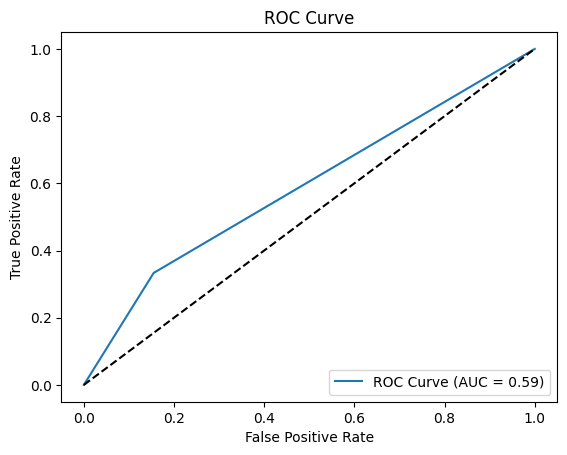

Cross-Validation Scores: [0.7265 0.727  0.74   0.7395 0.7465]
Mean CV Accuracy: 0.7359


In [23]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt = DecisionTreeClassifier(random_state=42)

dt.fit(x_train,y_train)

y_train_pred = dt.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = dt.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = dt.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(dt, x, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data3 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_dt = pd.DataFrame(data3)

In [24]:
df_dt

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,1.0000,0.7445,0.3447,0.3333,0.3389,[[1358 249]\n [ 262 131]],0.5892,[0.7265 0.727 0.74 0.7395 0.7465],0.7359


In [25]:
# # 분류 보고서
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# # 혼동 행렬
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

# basic-logistic regression

train accuracy:0.8034
test accuracy:0.8150
Precision: 0.6036
Recall: 0.1705
F1 Score: 0.2659
Confusion Matrix:
[[1563   44]
 [ 326   67]]
ROC AUC: 0.7484


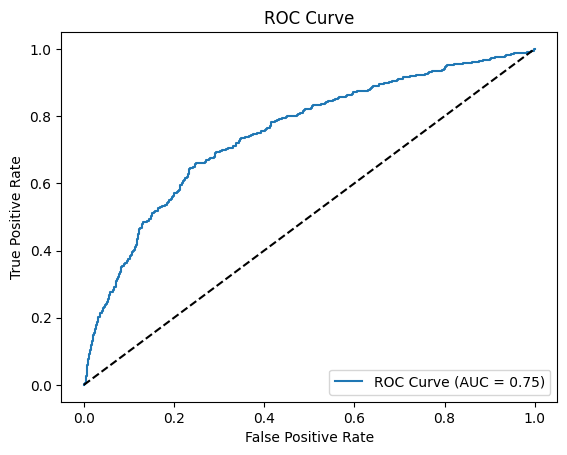

Cross-Validation Scores: [0.798  0.806  0.8105 0.812  0.802 ]
Mean CV Accuracy: 0.8057


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 로지스틱 회귀 모델 초기화
lr = LogisticRegression(
    # solver='liblinear',
    random_state=42)

lr.fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = lr.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = lr.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(lr, x, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data4 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_lr = pd.DataFrame(data4)

In [27]:
df_lr

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,0.8034,0.8150,0.6036,0.1705,0.2659,[[1563 44]\n [ 326 67]],0.7484,[0.798 0.806 0.8105 0.812 0.802 ],0.8057


# basic-support vector machine

train accuracy:0.8059
test accuracy:0.8095
Precision: 0.6304
Recall: 0.0738
F1 Score: 0.1321
Confusion Matrix:
[[1590   17]
 [ 364   29]]
ROC AUC: 0.7484


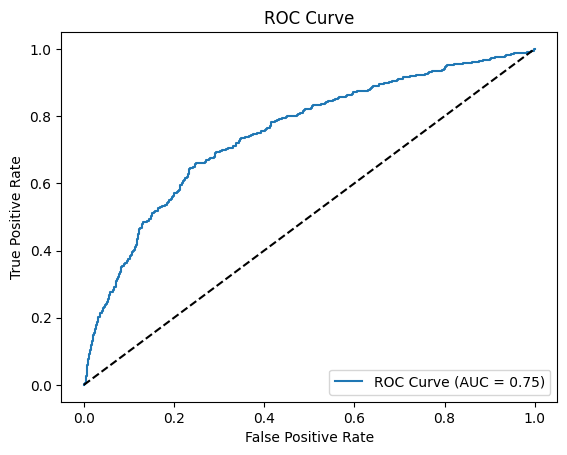

Cross-Validation Scores: [0.799 0.802 0.805 0.808 0.806]
Mean CV Accuracy: 0.8040


In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# SVM 모델 초기화
svc = SVC(random_state=42)

svc.fit(x_train,y_train)

y_train_pred = svc.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = svc.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

# y_pred_proba = svc.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(svc, x, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data5 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_svc = pd.DataFrame(data5)

In [29]:
df_svc

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,0.8059,0.8095,0.6304,0.0738,0.1321,[[1590 17]\n [ 364 29]],0.7484,[0.799 0.802 0.805 0.808 0.806],0.8040


# basic-artificial neural network

train accuracy:0.8147
test accuracy:0.8160
Precision: 0.5723
Recall: 0.2519
F1 Score: 0.3498
Confusion Matrix:
[[1533   74]
 [ 294   99]]
ROC AUC: 0.7560


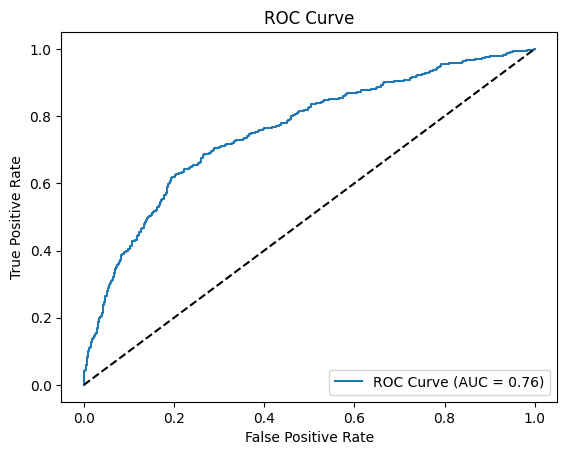

Cross-Validation Scores: [0.8135 0.807  0.807  0.809  0.8035]
Mean CV Accuracy: 0.8080


In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 인공 신경망 모델 초기화
# hidden_layer_sizes는 각 은닉층의 뉴런 수를 설정
mlp = MLPClassifier(random_state=42)

mlp.fit(x_train,y_train)

y_train_pred = mlp.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = mlp.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = mlp.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(mlp, x, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data6 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_mlp = pd.DataFrame(data6)

In [31]:
df_mlp

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,0.8147,0.8160,0.5723,0.2519,0.3498,[[1533 74]\n [ 294 99]],0.7560,[0.8135 0.807 0.807 0.809 0.8035],0.8080


# basic-light gbm

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267
train accuracy:0.8812
test accuracy:0.8190
Precision: 0.5896
Recall: 0.2595
F1 Score: 0.3604
Confusion Matrix:
[[1536   71]
 [ 291  102]]
ROC AUC: 0.7506


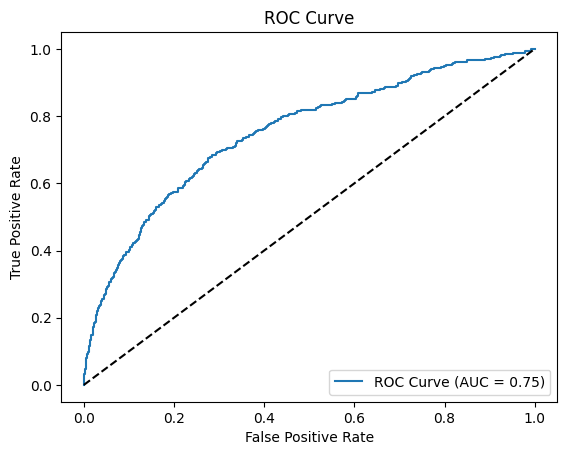

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1629, number of negative: 6371
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203625 -> initscore=-1.363790
[LightGBM] [Info] Start training from score -1.363790
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1629, number of negative: 6371
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 8000, number of used featur

In [32]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)

lgbm.fit(x_train,y_train)

y_train_pred = lgbm.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = lgbm.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = lgbm.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(lgbm, x, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data7 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_lgbm = pd.DataFrame(data7)

In [33]:
df_lgbm

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,0.8812,0.8190,0.5896,0.2595,0.3604,[[1536 71]\n [ 291 102]],0.7506,[0.82 0.8235 0.818 0.8195 0.8105],0.8183


# basic-gradient boosting machine

train accuracy:0.8356
test accuracy:0.8265
Precision: 0.6917
Recall: 0.2112
F1 Score: 0.3236
Confusion Matrix:
[[1570   37]
 [ 310   83]]
ROC AUC: 0.7510


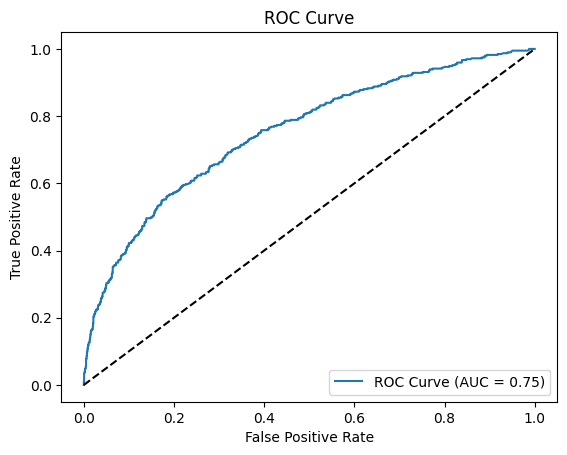

Cross-Validation Scores: [0.8155 0.819  0.817  0.82   0.812 ]
Mean CV Accuracy: 0.8167


In [34]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

gb.fit(x_train,y_train)

y_train_pred = gb.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = gb.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = gb.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(gb, x, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data8 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_gb = pd.DataFrame(data8)

In [35]:
df_gb

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,0.8356,0.8265,0.6917,0.2112,0.3236,[[1570 37]\n [ 310 83]],0.7510,[0.8155 0.819 0.817 0.82 0.812 ],0.8167


# basic-naive bayes

train accuracy:0.8024
test accuracy:0.8185
Precision: 0.6442
Recall: 0.1705
F1 Score: 0.2696
Confusion Matrix:
[[1570   37]
 [ 326   67]]
ROC AUC: 0.7485


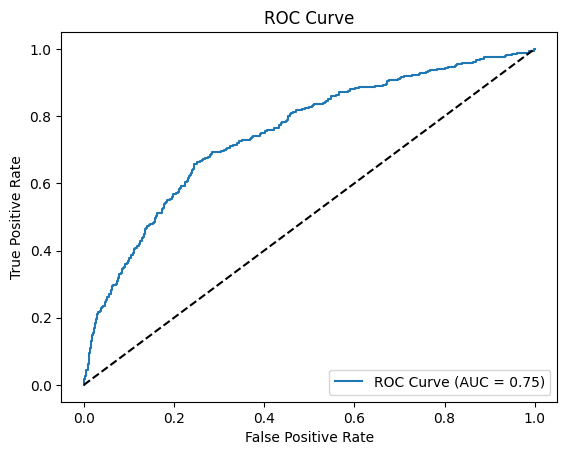

Cross-Validation Scores: [0.8025 0.8075 0.807  0.8115 0.7995]
Mean CV Accuracy: 0.8056


In [36]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train,y_train)

y_train_pred = nb.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = nb.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = nb.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(nb, x, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data9 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_nb = pd.DataFrame(data9)

In [37]:
df_nb

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,0.8024,0.8185,0.6442,0.1705,0.2696,[[1570 37]\n [ 326 67]],0.7485,[0.8025 0.8075 0.807 0.8115 0.7995],0.8056


# basic-catboost

Learning rate set to 0.025035
0:	learn: 0.6793225	total: 151ms	remaining: 2m 30s
1:	learn: 0.6660554	total: 155ms	remaining: 1m 17s
2:	learn: 0.6542543	total: 159ms	remaining: 52.8s
3:	learn: 0.6427178	total: 163ms	remaining: 40.5s
4:	learn: 0.6317203	total: 167ms	remaining: 33.2s
5:	learn: 0.6211932	total: 171ms	remaining: 28.4s
6:	learn: 0.6115808	total: 175ms	remaining: 24.9s
7:	learn: 0.6024951	total: 179ms	remaining: 22.2s
8:	learn: 0.5937954	total: 183ms	remaining: 20.2s
9:	learn: 0.5853502	total: 187ms	remaining: 18.6s
10:	learn: 0.5776188	total: 191ms	remaining: 17.2s
11:	learn: 0.5710377	total: 196ms	remaining: 16.1s
12:	learn: 0.5641499	total: 200ms	remaining: 15.2s
13:	learn: 0.5583473	total: 203ms	remaining: 14.3s
14:	learn: 0.5523293	total: 207ms	remaining: 13.6s
15:	learn: 0.5464744	total: 211ms	remaining: 13s
16:	learn: 0.5409079	total: 214ms	remaining: 12.4s
17:	learn: 0.5354243	total: 218ms	remaining: 11.9s
18:	learn: 0.5305745	total: 221ms	remaining: 11.4s
19:	learn: 

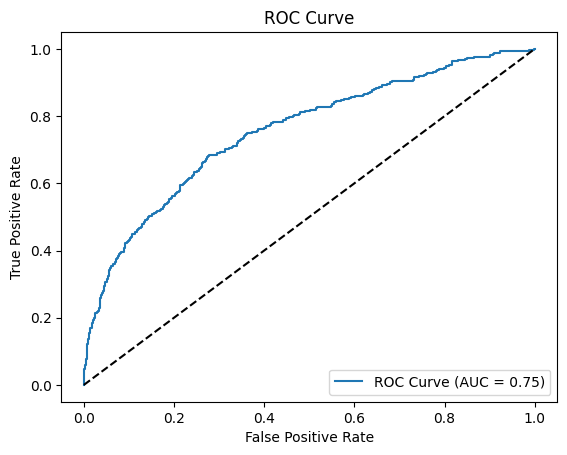

Learning rate set to 0.025035
0:	learn: 0.6793004	total: 4.53ms	remaining: 4.52s
1:	learn: 0.6660530	total: 9ms	remaining: 4.49s
2:	learn: 0.6542409	total: 12ms	remaining: 3.99s
3:	learn: 0.6427894	total: 15.7ms	remaining: 3.9s
4:	learn: 0.6315737	total: 19.2ms	remaining: 3.83s
5:	learn: 0.6210618	total: 23ms	remaining: 3.81s
6:	learn: 0.6112805	total: 26.6ms	remaining: 3.77s
7:	learn: 0.6019823	total: 29.8ms	remaining: 3.7s
8:	learn: 0.5934268	total: 33.4ms	remaining: 3.67s
9:	learn: 0.5860087	total: 37.1ms	remaining: 3.67s
10:	learn: 0.5783679	total: 40.6ms	remaining: 3.65s
11:	learn: 0.5712691	total: 43.8ms	remaining: 3.6s
12:	learn: 0.5641385	total: 47ms	remaining: 3.57s
13:	learn: 0.5574860	total: 50.1ms	remaining: 3.53s
14:	learn: 0.5514504	total: 53.7ms	remaining: 3.53s
15:	learn: 0.5455332	total: 57.1ms	remaining: 3.51s
16:	learn: 0.5400956	total: 60.4ms	remaining: 3.49s
17:	learn: 0.5352053	total: 64ms	remaining: 3.49s
18:	learn: 0.5302985	total: 67.3ms	remaining: 3.48s
19:	le

In [38]:
from catboost import CatBoostClassifier, Pool

cb = CatBoostClassifier()

cb.fit(x_train,y_train)

y_train_pred = cb.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = cb.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = cb.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(cb, x, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data10 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_cb = pd.DataFrame(data10)

In [39]:
df_cb

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,0.8766,0.8245,0.6312,0.2570,0.3653,[[1548 59]\n [ 292 101]],0.7543,[0.8225 0.828 0.821 0.8285 0.8195],0.8239


# 중간 점검

In [40]:
# 정확도-올바르게 분류된 샘플의 비율
# 정밀도-양성으로 예측한 샘플 중 실제로 양성인 샘플의 비율, 클래스의 불균형이 있을 경우 중요
# 재현율-실제 양성 샘플 중 양성으로 올바르게 예측된 비율, 놓치는 것을 최소화
# f1 점수-정밀도와 재현율의 조화 평균, 두 지표의 균형을 고려할 때 유용
# 혼동 행렬-예측과 실제 값 간의 관계 시각화
# roc 곡선 및 auc
# 교차 검증-여러 데이터 분할에서 평가하여 보다 신뢰할 수 있는 결과 제공

In [41]:
df_rf

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,1.0000,0.8240,0.6228,0.2646,0.3714,[[1544 63]\n [ 289 104]],0.7449,[0.8235 0.82 0.817 0.8155 0.816 ],0.8184


In [42]:
x_train.shape

(8000, 6)

In [43]:
y_train.shape

(8000,)

train accuracy:1.0000
test accuracy:0.7670
Precision: 0.4194
Recall: 0.4835
F1 Score: 0.4492
Confusion Matrix:
[[1344  263]
 [ 203  190]]
ROC AUC: 0.7387


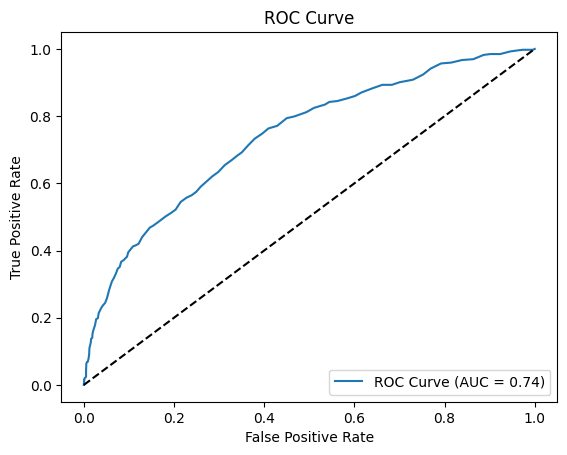

Cross-Validation Scores: [0.8235 0.82   0.817  0.8155 0.816 ]
Mean CV Accuracy: 0.8184


In [44]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import ADASYN

# SMOTE 적용
smote = ADASYN(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

y_train_pred = rf.predict(X_train_smote)
print(f'train accuracy:{accuracy_score(y_train_smote,y_train_pred):.4f}')

y_test_pred = rf.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = rf.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(rf, x, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data1 = {
    'Train Accuracy':[f'{accuracy_score(y_train_smote,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_rf = pd.DataFrame(data1)

In [45]:
df_rf

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,1.0000,0.7670,0.4194,0.4835,0.4492,[[1344 263]\n [ 203 190]],0.7387,[0.8235 0.82 0.817 0.8155 0.816 ],0.8184


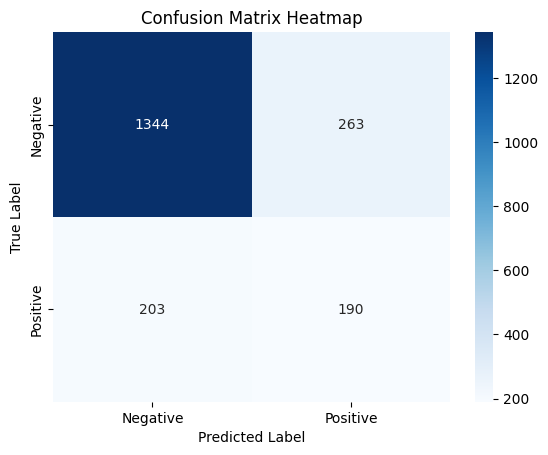

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# 모델 예측
y_test_pred = rf.predict(x_test)

# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_test_pred)

# 혼동 행렬을 DataFrame으로 변환
cm_df = pd.DataFrame(cm, index=['True Negative', 'False Positive'],
                     columns=['False Negative', 'True Positive'])

# 히트맵 그리기
# plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()


# 모델 최적화

train accuracy:1.0000
test accuracy:0.8240
Precision: 0.6228
Recall: 0.2646
F1 Score: 0.3714
Confusion Matrix:
[[1544   63]
 [ 289  104]]
ROC AUC: 0.7449


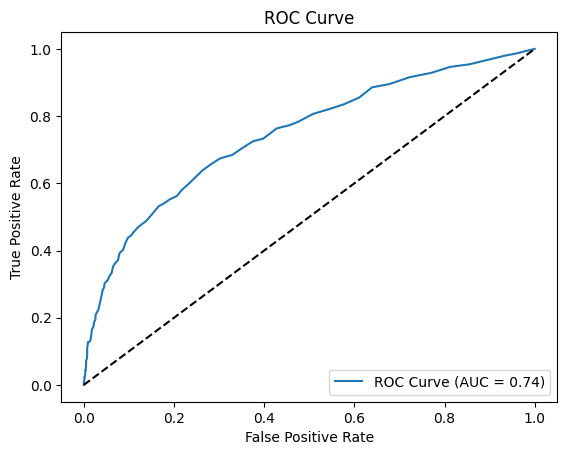

Cross-Validation Scores: [0.8235 0.82   0.817  0.8155 0.816 ]
Mean CV Accuracy: 0.8184


In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_train_pred = rf.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = rf.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = rf.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(rf, x, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data1 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_rf = pd.DataFrame(data1)

In [48]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# 랜덤 포레스트 모델 정의
rf = RandomForestClassifier()

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [50, 100, 200],          # 트리의 개수
    'max_depth': [None, 10, 20, 30],         # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],         # 내부 노드를 분할하는 데 필요한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],           # 리프 노드에 있는 최소 샘플 수
    'bootstrap': [True, False]               # 부트스트랩 샘플링 여부
}

# GridSearchCV 정의
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5,              # 교차 검증 폴드 수
                           n_jobs=-1,         # 모든 CPU 코어 사용
                           verbose=2)         # 출력의 상세도

# 모델 학습
grid_search.fit(x_train, y_train)

# 최적의 하이퍼파라미터와 점수 출력
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_:.2f}')

# 테스트 데이터로 평가
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {accuracy:.2f}')


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.82
Test Accuracy: 0.82


train accuracy:0.9196
test accuracy:0.8235
Precision: 0.6389
Recall: 0.2341
F1 Score: 0.3426
Confusion Matrix:
[[1555   52]
 [ 301   92]]
ROC AUC: 0.7542


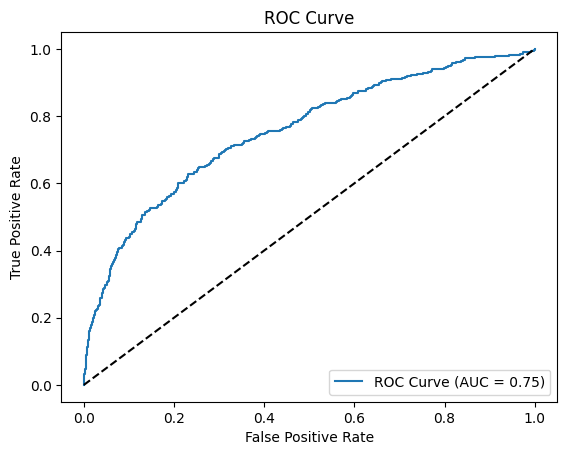

Cross-Validation Scores: [0.8255 0.822  0.823  0.823  0.818 ]
Mean CV Accuracy: 0.8223


In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    random_state=42,
    bootstrap=True,
    max_depth=30,
    min_samples_leaf=2,
    min_samples_split=10,
    n_estimators=100
    )
rf.fit(x_train, y_train)

y_train_pred = rf.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = rf.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = rf.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(rf, x, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data1 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_rf = pd.DataFrame(data1)

In [50]:
df_rf

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,0.9196,0.8235,0.6389,0.2341,0.3426,[[1555 52]\n [ 301 92]],0.7542,[0.8255 0.822 0.823 0.823 0.818 ],0.8223
